# Results

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [2]:
# Reading in the results dataframes

df_scores = pd.read_csv('./results/scores_dataframe.csv', index_col = 'Unnamed: 0')
coefs = pd.read_csv('./results/word_coefs.csv')

In [3]:
# Formatting columns

coefs = coefs.rename(columns = {'Unnamed: 0' : 'words',
                       '0' : 'coefficients'})

In [4]:
# Sorting the dataframe by highest coefficients of correlation

coefs = coefs.sort_values(by='coefficients', ascending = False)

In [9]:
df_graph

,estimator,train score,test score
6,K Nearest Neighbor,0.827903,0.674732
2,Multinomial Naive Bayes,0.730199,0.721214
1,Logistic Regression,0.758251,0.722381
0,Logistic Regression/Tfidf,0.759772,0.727369
8,Gradient Booster,0.788638,0.748275
9,Support Vector Classifier,0.845237,0.751671
7,Bagging Classifier,0.980862,0.807068
4,Random Forest,0.976299,0.815027
5,Extra Trees,0.980862,0.825639
10,Large Random Forest,0.979377,0.832113


In [7]:
# Dropping duplicate rows

df_scores = df_scores.drop_duplicates(subset = 'estimator')

In [8]:
# Sorting the dataframe by test score, descending

df_graph = df_scores.sort_values(by='test score', ascending = True)

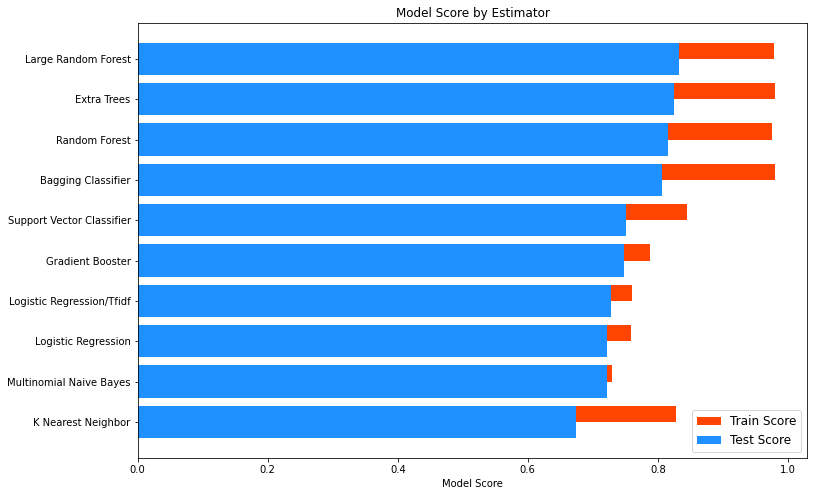

In [7]:
# Graphing model performances

plt.figure(figsize= (12, 8))
plt.barh(df_graph['estimator'], df_graph['train score'], 
        color = 'orangered', height = .4, align= 'edge')
plt.barh(df_graph['estimator'], df_graph['test score'], 
        align = 'center', color = 'dodgerblue')
plt.xlabel('Model Score')
plt.title('Model Score by Estimator')
plt.legend(('Train Score', 'Test Score'), fontsize = 'large');

In [8]:
# Checking the amount of stopwords in the coefs dataframe

stops = stopwords.words('english')

coefs['words'].isin(stops).sum()

126

In [9]:
# Replacing stopwords with NaN values

coefs['words'].mask(coefs['words'].isin(stops), np.nan, inplace = True)

In [10]:
# Dropping stopwords/NaN values

coefs = coefs.dropna()

In [11]:
# Consolidating top 15 most important words

coefs_top = coefs[:15]

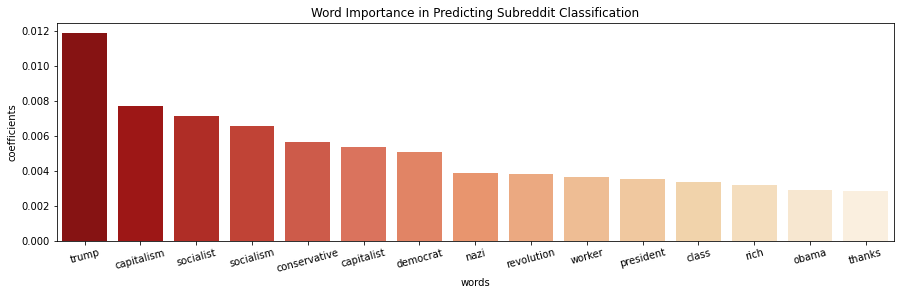

In [13]:
# Graphing 15 most important words

plt.figure(figsize = (15,4))
sns.barplot(x = 'words', y = 'coefficients', data = coefs_top,
           palette= 'OrRd_r')
plt.xticks(rotation = 15)
plt.title('Word Importance in Predicting Subreddit Classification');